In [38]:
#Importing libraires and resources

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,7
rcParams['axes.grid'] = True
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib
from sklearn.decomposition import PCA
from sklearn import datasets, svm, metrics
from sklearn import preprocessing
from sklearn.utils import resample
import itertools
import scipy.stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline


In [2]:
#importing data

In [3]:
features = ['year', 'timbre1', 'timbre2', 'timbre3', 'timbre4', 'timbre5', 'timbre6', 'timbre7', 'timbre8', 'timbre9', 'timbre10', 'timbre11', 'timbre12', 'timbre13', 'timbre14', 'timbre15', 'timbre16', 'timbre17', 'timbre18', 'timbre19', 'timbre20', 'timbre21', 'timbre22', 'timbre23', 'timbre24', 'timbre25', 'timbre26', 'timbre27', 'timbre28', 'timbre29', 'timbre30', 'timbre31', 'timbre32', 'timbre33', 'timbre34', 'timbre35', 'timbre36 ', 'timbre37', 'timbre38', 'timbre39', 'timbre40', 'timbre41', 'timbre42', 'timbre43', 'timbre44', 'timbre45', 'timbre46', 'timbre47', 'timbre48', 'timbre49', 'timbre50', 'timbre51', 'timbre52', 'timbre53' , 'timbre54', 'timbre55', 'timbre56', 'timbre57', 'timbre58', 'timbre59', 'timbre60', 'timbre61', 'timbre62', 'timbre63', 'timbre64', 'timbre65', 'timbre66', 'timbre67', 'timbre68', 'timbre69', 'timbre70', 'timbre71', 'timbre72', 'timbre73', 'timbre74', 'timbre75', 'timbre76', 'timbre77', 'timbre78', 'timbre79', 'timbre80', 'timbre81', 'timbre82', 'timbre83', 'timbre84', 'timbre85', 'timbre86', 'timbre87', 'timbre88', 'timbre89', 'timbre90']

In [4]:
data=pd.read_csv('/Users/luciedrevet/Documents/S7/Python for data analysis/Projet/YearPredictionMSD.csv', names=features)

print('the number of rows and colums are'+str(data.shape))

the number of rows and colums are(515345, 91)


In [5]:
## EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       515345 non-null  int64  
 1   timbre1    515345 non-null  float64
 2   timbre2    515345 non-null  float64
 3   timbre3    515345 non-null  float64
 4   timbre4    515345 non-null  float64
 5   timbre5    515345 non-null  float64
 6   timbre6    515345 non-null  float64
 7   timbre7    515345 non-null  float64
 8   timbre8    515345 non-null  float64
 9   timbre9    515345 non-null  float64
 10  timbre10   515345 non-null  float64
 11  timbre11   515345 non-null  float64
 12  timbre12   515345 non-null  float64
 13  timbre13   515345 non-null  float64
 14  timbre14   515345 non-null  float64
 15  timbre15   515345 non-null  float64
 16  timbre16   515345 non-null  float64
 17  timbre17   515345 non-null  float64
 18  timbre18   515345 non-null  float64
 19  timbre19   515345 non-n

In [7]:
#No missing values that we have to delete

In [8]:
data.head(5)

,year,timbre1,timbre2,timbre3,timbre4,timbre5,timbre6,timbre7,timbre8,timbre9,...,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89,timbre90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,515345.0,1998.397082,10.931046,1922.00000,1994.00000,2002.00000,2006.00000,2011.00000
timbre1,515345.0,43.387126,6.067558,1.74900,39.95469,44.25850,47.83389,61.97014
timbre2,515345.0,1.289554,51.580351,-337.09250,-26.05952,8.41785,36.12401,384.06573
timbre3,515345.0,8.658347,35.268585,-301.00506,-11.46271,10.47632,29.76482,322.85143
timbre4,515345.0,1.164124,16.322790,-154.18358,-8.48750,-0.65284,8.78754,335.77182
...,...,...,...,...,...,...,...,...
timbre86,515345.0,17.669213,114.427905,-3168.92457,-31.58061,15.59847,67.79496,3662.06565
timbre87,515345.0,-26.315336,173.977336,-4319.99232,-101.53030,-21.20412,52.38933,2833.60895
timbre88,515345.0,4.458641,13.346557,-236.03926,-2.56609,3.11764,9.96774,463.41950
timbre89,515345.0,20.035136,185.558247,-7458.37815,-59.50927,7.75973,86.35161,7393.39844


Text(0.5, 1.0, 'Downsampled dataset')

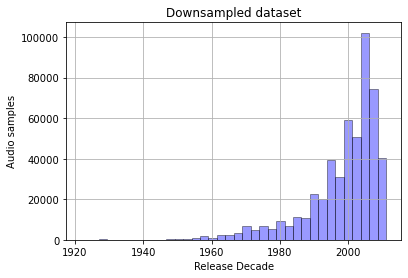

In [10]:
sns.distplot(data['year'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.ylabel("Audio samples")
plt.xlabel("Release Decade")
plt.title("Downsampled dataset")

In [11]:
#We notice that the frequency of the counts start to take off in the late 1970s 
#to dawn of 1980s, likely coinciding with the invention of the CDs by Philips and Sony!

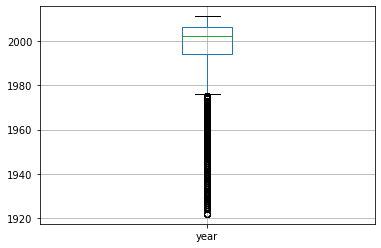

In [12]:
boxplot = data.boxplot(column=['year'])
boxplot

In [13]:
print("(Year, Features) {}".format(data.iloc[:,:1].shape))
data.iloc[:,:1].describe()

(Year, Features) (515345, 1)


,year
count,515345.000000
mean,1998.397082
std,10.931046
min,1922.000000
25%,1994.000000
50%,2002.000000
75%,2006.000000
max,2011.000000


In [14]:
#What we can clearly see is that the central mass between 
#the 1st and 3rd quartiles lies in years ranging from the mid 1990s to the mid 2000s.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ef3e3a1c0>,
      dtype=object)

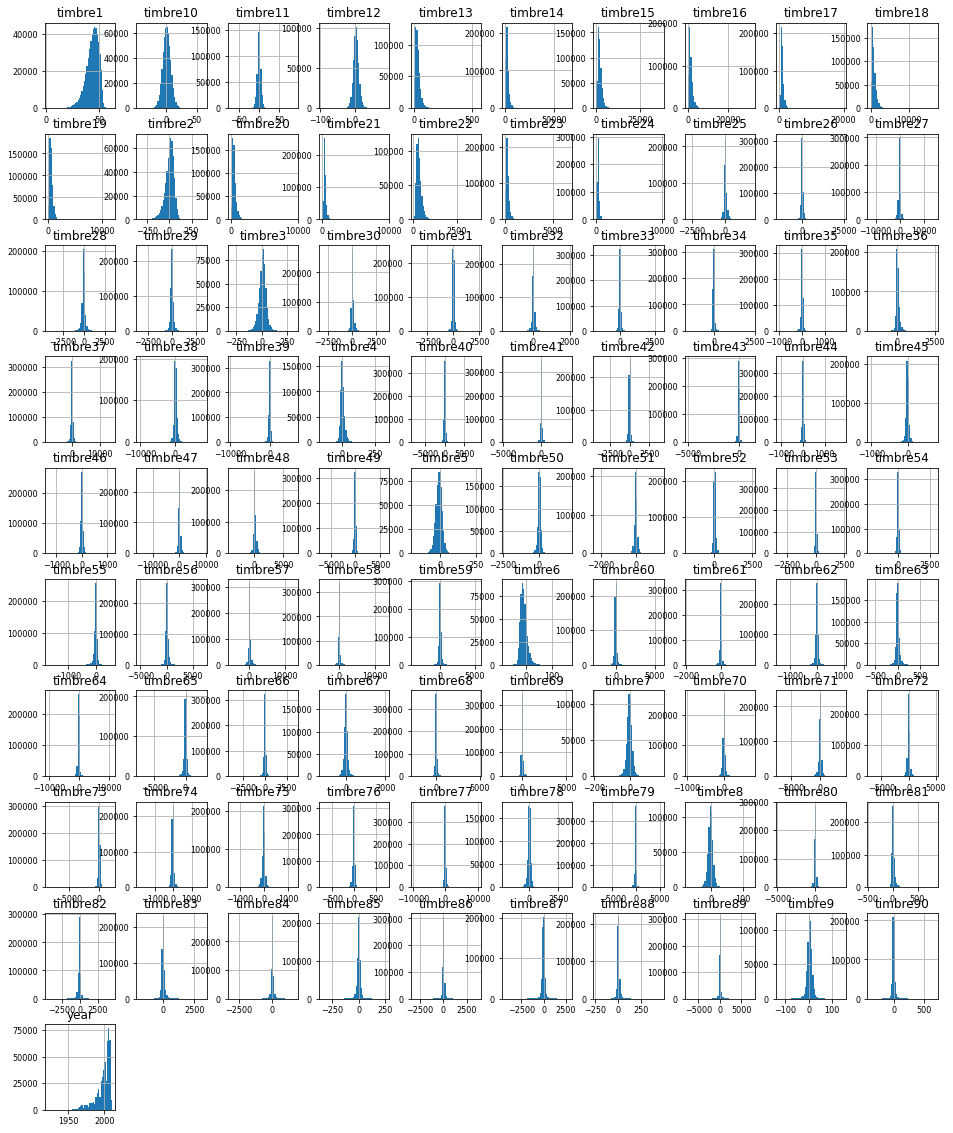

In [11]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
# timbre1 is the only variable that seems to share a similar shape with our target

In [6]:
#We normalize the data
data.iloc[:,1:] = (data.iloc[:,1:]-data.iloc[:,1:].min())/(data.iloc[:,1:].max() - data.iloc[:,1:].min())

In [16]:
data.describe()

,year,timbre1,timbre2,timbre3,timbre4,timbre5,timbre6,timbre7,timbre8,timbre9,...,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89,timbre90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,0.691420,0.469220,0.496370,0.317065,0.395025,0.291384,0.515292,0.354893,0.477338,...,0.354641,0.487939,0.368868,0.649008,0.567965,0.466491,0.600212,0.343834,0.503537,0.361319
std,10.931046,0.100755,0.071524,0.056533,0.033315,0.051486,0.051839,0.040408,0.039970,0.038797,...,0.025103,0.019795,0.024342,0.019669,0.026832,0.016751,0.024320,0.019081,0.012494,0.020852
min,1922.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,0.634423,0.431296,0.464117,0.297366,0.363241,0.255425,0.492028,0.331428,0.455263,...,0.340902,0.480489,0.356416,0.640192,0.556182,0.459281,0.589698,0.333791,0.498181,0.351738
50%,2002.000000,0.705890,0.479105,0.499284,0.313357,0.396254,0.284665,0.516247,0.355178,0.477685,...,0.349492,0.490235,0.366329,0.648116,0.568804,0.466188,0.600926,0.341917,0.502710,0.360114
75%,2006.000000,0.765261,0.517524,0.530202,0.332624,0.427220,0.320143,0.539971,0.378515,0.500192,...,0.362867,0.497739,0.378451,0.657254,0.581505,0.473829,0.611214,0.351711,0.508002,0.369201
max,2011.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


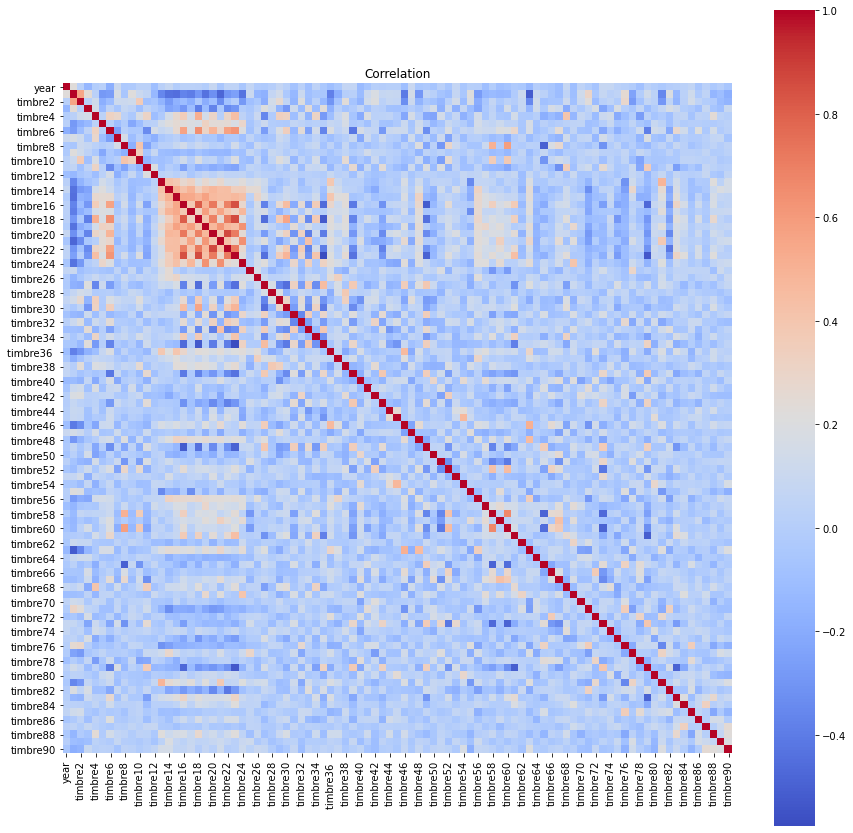

In [29]:
#corelation matrix
corr = data.iloc[:,:].corr()
fig, ax = plt.subplots(figsize=(15,15)) 
plt.title("Correlation")
sns.heatmap(corr, square=True, cmap='coolwarm', annot=False)
plt.show()
#We notice some important correlation around the variables timbre14 to timbre timbre24

In [7]:
data.grouped=data
data.grouped['year'] = data.grouped.year.apply(lambda year : year-(year%10))
#On regroupe par dizaine d'année

<ipython-input-7-a18279227d63>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.grouped=data


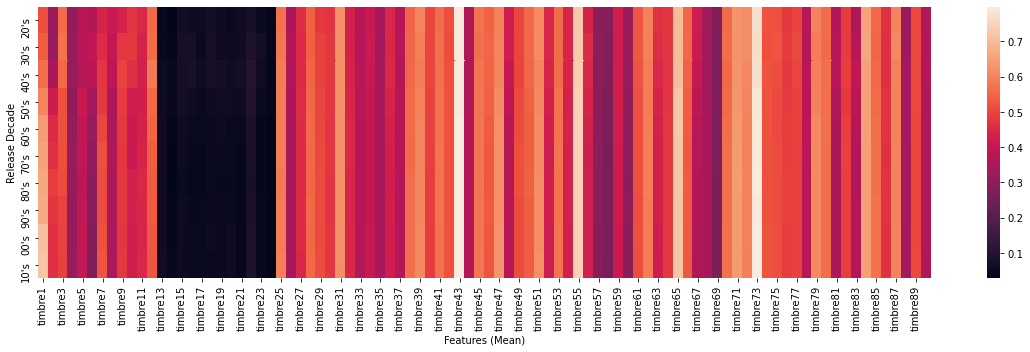

In [19]:
# How do features differ by release decade?
columns = data.grouped.groupby(['year']).mean().columns
labels = ["{:02d}'s".format(l%100) for l in sorted(data.grouped.year.unique())]
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(data.grouped.groupby(['year']).mean().iloc[:,:], yticklabels=labels)
plt.ylabel("Release Decade")
plt.xlabel("Features (Mean)")
plt.show()

In [20]:
#We can see that exept for the variable 'timbre1', the features are pretty much the same by release decade...

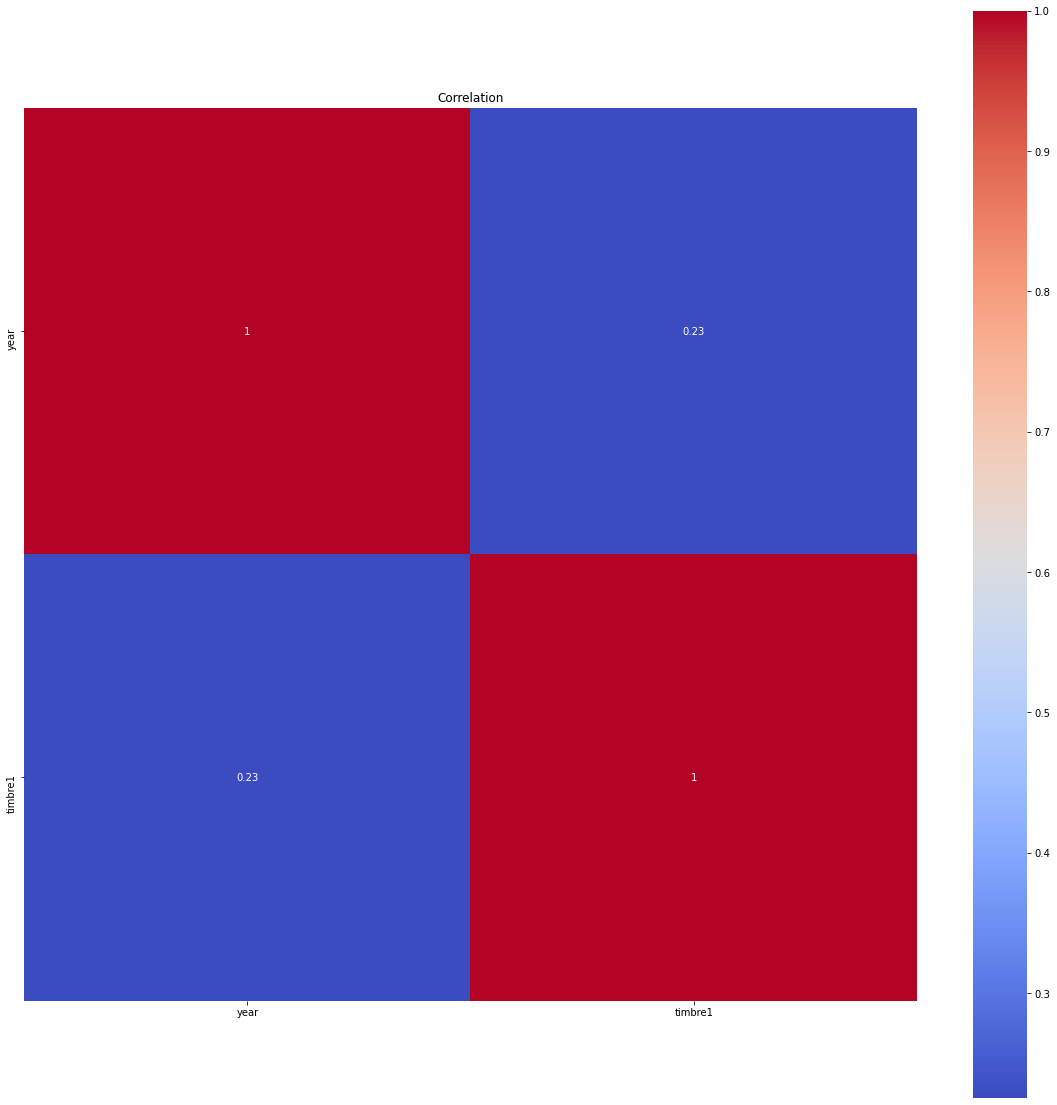

In [30]:
# Correlation between the release decade and features
corr = data.iloc[:,:2].corr()
fig, ax = plt.subplots(figsize=(20,20)) 
plt.title("Correlation")
sns.heatmap(corr, square=True, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
# And the correlation is pretty low...

In [21]:
## Preprocessing the data

In [7]:
# separate train attributes and test into different dataframes
X = data.iloc[:,1:]
Y = data.iloc[:,0]
Y = Y - Y.min()    

Train = data.iloc[0:463715]
Test = data.iloc[463715:]

# Train set
X_train = X.iloc[0:463715].values
y_train = Y.iloc[0:463715].values

# Validation set
X_test = X.iloc[463715:].values
y_test = Y.iloc[463715:].values
print("Train : X ", X_train.shape, ", Y ", y_train.shape)
print("Test : X ", X_test.shape, ", Y ", y_test.shape)


Train : X  (463715, 90) , Y  (463715,)
Test : X  (51630, 90) , Y  (51630,)


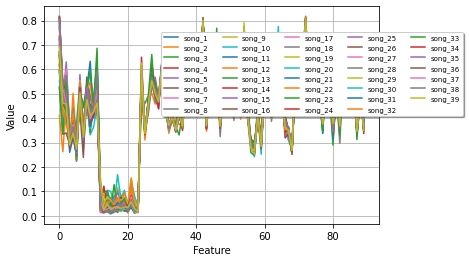

In [23]:
for i in range(1,40):
    plt.plot(X_train[i], label='song_' + str(i))
    
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 0.9), ncol=5, fancybox=True, shadow=True, fontsize=7)

In [27]:
# PCA

In [28]:
def c_variance(x):
    total=0
    clist=[]
    for i in np.arange(0,X_train.shape[1]):
        p=PCA(n_components=i+1)
        p.fit(x)
        total=total+p.explained_variance_ratio_[i]
        clist.append(total)
        
    return clist
x_train_variance=list(map(lambda x:x*100,c_variance(X_train)))

Text(0.5, 1.0, 'comulative variance ratio of p.c.a components')

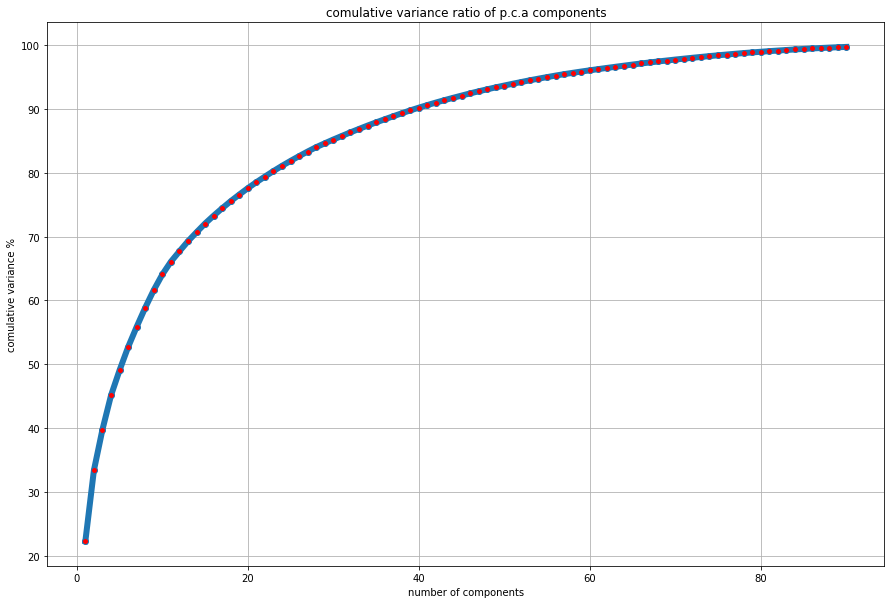

In [29]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(1,X_train.shape[1]+1),x_train_variance,marker='o',markerfacecolor='red',lw=6)
plt.xlabel('number of components')
plt.ylabel('comulative variance %')
plt.title('comulative variance ratio of p.c.a components')

In [30]:
pca = PCA(n_components=20).fit(X_train)
X_pca = pca.transform(X_train)

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


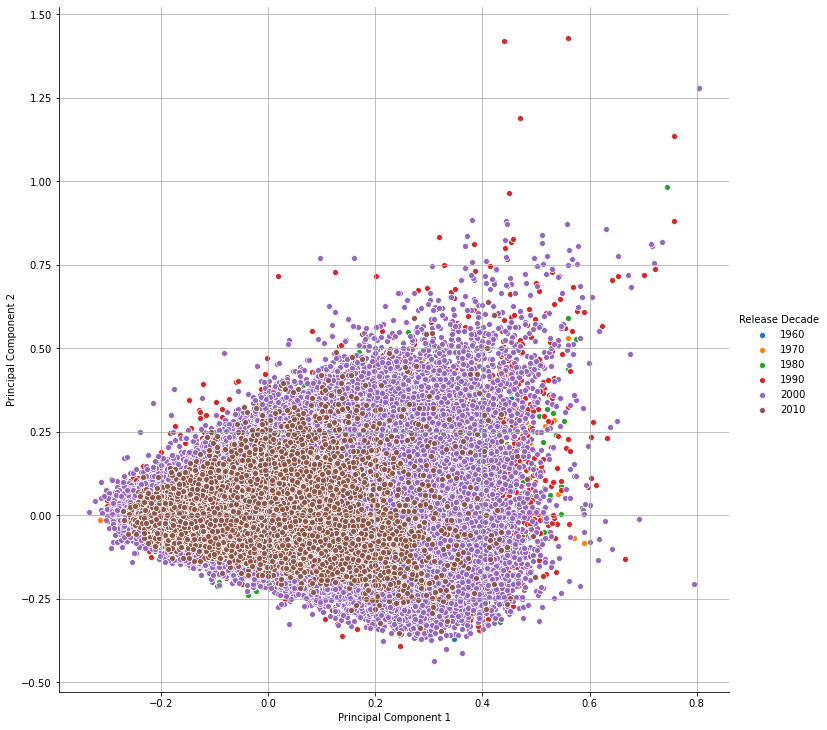

In [31]:
principal_components = []
samples, features = X_pca.shape
for m in range(1, features+1):
    principal_components.append("Principal Component {}".format(m))
cols = principal_components+["Release Decade"]    
df_pca = pd.DataFrame(np.append(X_pca, y_train.reshape(samples,1), axis=1), columns=cols)
df_pca["Release Decade"] = df_pca["Release Decade"].astype(int)
sns.pairplot(df_pca, hue="Release Decade",x_vars="Principal Component 1",y_vars="Principal Component 2", size=10)

In [32]:
p_train=pca.fit_transform(X_train)

In [33]:
# MODEL

In [109]:
#linear regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test).round()

In [110]:
cnf_matrix = metrics.confusion_matrix(y_test, predicted)

In [111]:
accuracy_score(y_test, predicted)

0.044237846213441796

In [ ]:
#RANFOM FOREST MODEL

In [116]:
grid_search2 = GridSearchCV(RandomForestRegressor(),
                           {'n_estimators': [2,10], 
                            'max_depth': [2,10], 
                            'min_samples_split' : [10,40]
                           },
                           cv=None)
grid_search2.fit(X_train, y_train)
clf2 = grid_search2.best_estimator_
print(clf2)

RandomForestRegressor(max_depth=10, min_samples_split=40, n_estimators=10)


In [113]:
clf2 = RandomForestRegressor(n_estimators=10,max_depth=10,min_samples_split=40);
clf2.fit(X_train, y_train)
predicted2 = clf2.predict(X_test)

In [114]:
predicted2=predicted2.round()
cnf_matrix2 = metrics.confusion_matrix(y_test, predicted2)

In [115]:
accuracy_score(y_test, predicted2)

0.02287429788882433

In [ ]:
#LOGISTIC REGRESSION

In [ ]:
grid_search3 = GridSearchCV(LogisticRegression(),
                           {'n_estimators': [2,4,6,8,10], 
                            'max_depth': [2,4,6,8,10], 
                            'min_samples_split' : [10,20,30,40]
                           },
                           cv=None)
grid_search3.fit(X_train, y_train)
clf3 = grid_search3.best_estimator_
print(clf3)

In [19]:
clf3 = LogisticRegression()
clf3.fit(X_train, y_train)
predicted3 = clf3.predict(X_test)

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
predicted3=predicted3.round()
cnf_matrix3 = metrics.confusion_matrix(y_test, predicted3)

In [21]:
accuracy_score(y_test, predicted3)

0.07490692164494839

In [ ]:
#DECISION TREE

In [29]:
clf4 = DecisionTreeRegressor()
clf4.fit(X_train, y_train)
predicted4 = clf4.predict(X_test)

In [30]:
predicted4 = predicted4.round()
cnf_matrix4 = metrics.confusion_matrix(y_test, predicted4)

In [31]:
accuracy_score(y_test, predicted4)

0.05967591809104755

In [ ]:
#KNN

In [14]:
#Neural net

In [8]:
# Our deep learning library is Keras

from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.models import load_model
from keras.regularizers import l2
from keras.utils import np_utils
import numpy as np
# fixed random seed for reproducibility
np.random.seed(0)
import sys
sys.path.append("c:/ml/lib")
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [9]:
#X_test.shape[0]
Y_train = np_utils.to_categorical(y_train, 90)
Y_test = np_utils.to_categorical(y_test, 90)

IndexError: index 90 is out of bounds for axis 1 with size 90

In [19]:
# Our first Keras Model
model1 = Sequential()
model1.add(Dense(90, input_shape=(90,), activation='relu'))
model1.add(Dense(110, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(90, activation='sigmoid'))

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [21]:
model1.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [22]:
h1=model1.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=10,
    validation_data=(X_test, Y_test),
    callbacks=[learning_rate_reduction]
)

Epoch 1/10
3623/3623 [==============================] - 4s 1ms/step - loss: 0.0510 - accuracy: 0.0724 - val_loss: 0.0479 - val_accuracy: 0.0783
Epoch 2/10
3623/3623 [==============================] - 4s 1ms/step - loss: 0.0479 - accuracy: 0.0782 - val_loss: 0.0474 - val_accuracy: 0.0789
Epoch 3/10
3623/3623 [==============================] - 4s 1ms/step - loss: 0.0475 - accuracy: 0.0800 - val_loss: 0.0471 - val_accuracy: 0.0792
Epoch 4/10
3623/3623 [==============================] - 4s 1ms/step - loss: 0.0473 - accuracy: 0.0813 - val_loss: 0.0470 - val_accuracy: 0.0812
Epoch 5/10
3623/3623 [==============================] - 4s 1ms/step - loss: 0.0471 - accuracy: 0.0822 - val_loss: 0.0467 - val_accuracy: 0.0809
Epoch 6/10
3623/3623 [==============================] - 4s 1ms/step - loss: 0.0470 - accuracy: 0.0829 - val_loss: 0.0466 - val_accuracy: 0.0816
Epoch 7/10
3623/3623 [==============================] - 4s 1ms/step - loss: 0.0469 - accuracy: 0.0831 - val_loss: 0.0472 - val_accuracy:

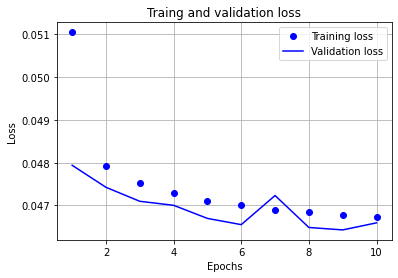

In [23]:
history_dict = h1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 10 + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

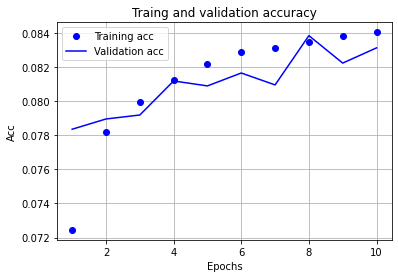

In [24]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, 10 + 1)

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [31]:
P = model1.predict_classes(X_test)
P

array([85, 85, 85, ..., 85, 85, 85])

In [32]:
cnf_matrix8 = metrics.confusion_matrix(y_test, P)
accuracy_score(y_test, P)

0.0831105946155336

<Figure size 432x288 with 0 Axes>

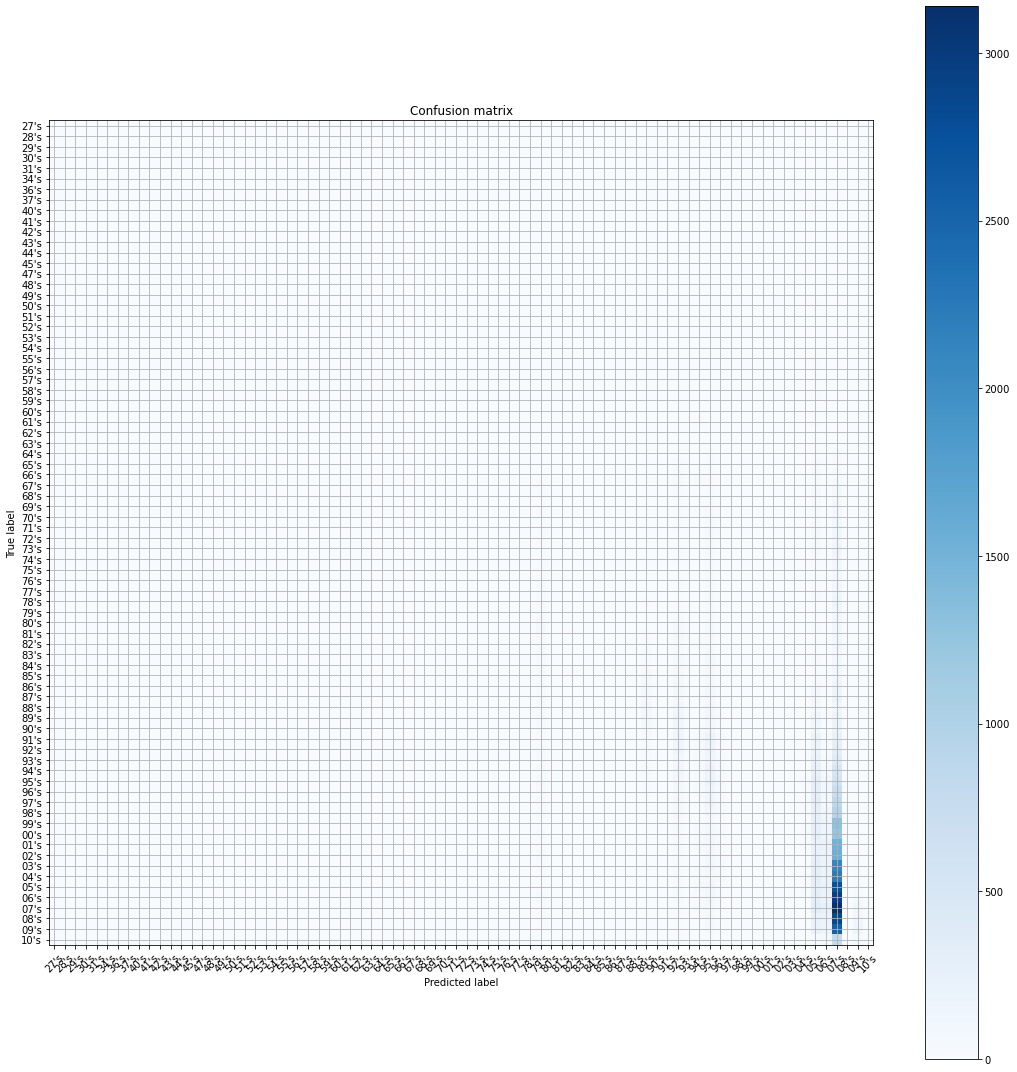

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
fig, ax = plt.subplots(figsize=(15,15)) 
labels = sorted(Test.year.unique())
plot_confusion_matrix(cnf_matrix8, classes=["{:02d}'s".format(label%100) for label in labels],
                      title='Confusion matrix')


plt.show()

In [ ]:
#We are gonna try something else : prediction by group of year

In [9]:
# separate train attributes and test into different dataframes
Xg = data.grouped.iloc[:,1:]
Yg = data.grouped.iloc[:,0]
Yg = Yg - Yg.min()    

Traing = data.grouped.iloc[0:463715]
Testg = data.grouped.iloc[463715:]

# Train set
X_traing = Xg.iloc[0:463715].values
y_traing = Yg.iloc[0:463715].values

# Validation set
X_testg = Xg.iloc[463715:].values
y_testg = Yg.iloc[463715:].values
print("Train grouped : X ", X_traing.shape, ", Y ", y_traing.shape)
print("Test grouped: X ", X_testg.shape, ", Y ", y_testg.shape)

Train grouped : X  (463715, 90) , Y  (463715,)
Test grouped: X  (51630, 90) , Y  (51630,)


In [10]:
#X_test.shape[0]
Y_traing = np_utils.to_categorical(y_traing-1, 90)
Y_testg = np_utils.to_categorical(y_testg-1, 90)

In [93]:
def create_model(optimizer="RMSprop",loss ='binary_crossentropy' ):
    model = Sequential()
    model.add(Dense(90, input_shape=(90,), activation='relu'))
    model.add(Dense(110, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(90, activation='sigmoid'))
    model.compile(loss=loss, optimizer=optimizer,metrics=["accuracy"])
    return model

In [94]:
kears_estimator = KerasClassifier(build_fn=create_model, verbose=1, epochs = 5, batch_size = 64)

In [95]:
# define the grid search parameters
param_grid = dict(loss = ['categorical_crossentropy','binary_crossentropy','sparse_categorical_crossentropy'],
                 optimizer = ['SGD','RMSprop','Adagrad','Adadelta','Adam'])

In [96]:
grid = GridSearchCV(estimator=kears_estimator,  
                    param_grid=param_grid,)

In [97]:
grid_result = grid.fit(X_traing, Y_traing )

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/5
5797/5797 [==============================] - 4s 737us/step - loss: 1.4649 - accuracy: 0.5315
Epoch 2/5
5797/5797 [==============================] - 4s 700us/step - loss: 1.2780 - accuracy: 0.5728
Epoch 3/5
5797/5797 [==============================] - 4s 690us/step - loss: 1.2204 - accuracy: 0.5836
Epoch 4/5
5797/5797 [==============================] - 4s 692us/step - loss: 1.2169 - accuracy: 0.5836
Epoch 5/5
1450/1450 [==============================] - 1s 446us/step - loss: 1.2392 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 4s 689us/step - loss: 1.4448 - accuracy: 0.5761
Epoch 2/5
5797/5797 [==============================] - 4s 684us/step - loss: 1.2316 - accuracy: 0.5792
Epoch 3/5
5797/5797 [==============================] - 4s 693us/step - loss: 1.2234 - accuracy: 0.5792
Epoch 4/5
5797/5797 [==============================] - 4s 686us/step - loss: 1.2205 - accuracy: 0.5792
Epoch 5/5
1450/1450 [==============================] - 1s 443us/step - lo

5797/5797 [==============================] - 4s 773us/step - loss: 1.3450 - accuracy: 0.5695
Epoch 4/5
5797/5797 [==============================] - 4s 773us/step - loss: 1.3348 - accuracy: 0.5714
Epoch 5/5
1450/1450 [==============================] - 1s 478us/step - loss: 1.2765 - accuracy: 0.5852
Epoch 1/5
5797/5797 [==============================] - 5s 779us/step - loss: 1.9933 - accuracy: 0.5699
Epoch 2/5
5797/5797 [==============================] - 5s 778us/step - loss: 1.3312 - accuracy: 0.5822
Epoch 3/5
5797/5797 [==============================] - 5s 779us/step - loss: 1.2907 - accuracy: 0.5822
Epoch 4/5
5797/5797 [==============================] - 4s 762us/step - loss: 1.2740 - accuracy: 0.5822
Epoch 5/5
1450/1450 [==============================] - 1s 481us/step - loss: 1.2297 - accuracy: 0.5728
Epoch 1/5
5797/5797 [==============================] - 5s 784us/step - loss: 4.1806 - accuracy: 0.3451
Epoch 2/5
5797/5797 [==============================] - 4s 776us/step - loss: 2.4885

1450/1450 [==============================] - 1s 505us/step - loss: 0.0216 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 4s 729us/step - loss: 0.0881 - accuracy: 0.4941
Epoch 2/5
5797/5797 [==============================] - 4s 747us/step - loss: 0.0250 - accuracy: 0.5675
Epoch 3/5
5797/5797 [==============================] - 4s 737us/step - loss: 0.0238 - accuracy: 0.5758
Epoch 4/5
5797/5797 [==============================] - 5s 837us/step - loss: 0.0232 - accuracy: 0.5773
Epoch 5/5
1450/1450 [==============================] - 1s 581us/step - loss: 0.0218 - accuracy: 0.5913
Epoch 1/5
5797/5797 [==============================] - 5s 798us/step - loss: 0.0965 - accuracy: 0.4975
Epoch 2/5
5797/5797 [==============================] - 5s 792us/step - loss: 0.0249 - accuracy: 0.5672
Epoch 3/5
5797/5797 [==============================] - 5s 797us/step - loss: 0.0236 - accuracy: 0.5763
Epoch 4/5
5797/5797 [==============================] - 4s 769us/step - loss: 0.0231

5797/5797 [==============================] - 5s 918us/step - loss: 0.1612 - accuracy: 0.3786
Epoch 3/5
5797/5797 [==============================] - 5s 894us/step - loss: 0.0491 - accuracy: 0.5365
Epoch 4/5
5797/5797 [==============================] - 5s 867us/step - loss: 0.0356 - accuracy: 0.5418
Epoch 5/5
1450/1450 [==============================] - 1s 551us/step - loss: 0.0249 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 5s 823us/step - loss: 0.5351 - accuracy: 0.0471
Epoch 2/5
5797/5797 [==============================] - 5s 803us/step - loss: 0.1568 - accuracy: 0.4459
Epoch 3/5
5797/5797 [==============================] - 5s 807us/step - loss: 0.0503 - accuracy: 0.5444
Epoch 4/5
5797/5797 [==============================] - 5s 803us/step - loss: 0.0366 - accuracy: 0.5457
Epoch 5/5
1450/1450 [==============================] - 1s 514us/step - loss: 0.0245 - accuracy: 0.5851
Epoch 1/5
5797/5797 [==============================] - 5s 779us/step - loss: 0.5584

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5


/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(

Epoch 1/5
7246/7246 [==============================] - 6s 818us/step - loss: 0.0225 - accuracy: 0.5858
Epoch 2/5
7246/7246 [==============================] - 6s 837us/step - loss: 0.0192 - accuracy: 0.6082
Epoch 3/5
7246/7246 [==============================] - 6s 807us/step - loss: 0.0189 - accuracy: 0.6129
Epoch 4/5
7246/7246 [==============================] - 6s 805us/step - loss: 0.0187 - accuracy: 0.6163
Epoch 5/5
7246/7246 [==============================] - 6s 810us/step - loss: 0.0186 - accuracy: 0.6182
Best: 0.620853 using {'loss': 'binary_crossentropy', 'optimizer': 'Adam'}


In [98]:
def create_model2(activation='relu'):
    model = Sequential()
    model.add(Dense(90, input_shape=(90,), activation=activation))
    model.add(Dense(110, activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(90, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=["accuracy"])
    return model

In [99]:
kears_estimator2 = KerasClassifier(build_fn=create_model2, verbose=1, epochs = 5, batch_size = 64)

In [100]:
# define the grid search parameters
param_grid2 = dict(activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

In [101]:
grid2 = GridSearchCV(estimator=kears_estimator2,  
                    param_grid=param_grid2,)

In [103]:
grid_result2 = grid2.fit(X_traing, Y_traing )

# summarize results
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Epoch 1/5
5797/5797 [==============================] - 5s 891us/step - loss: 0.1042 - accuracy: 0.5828
Epoch 2/5
5797/5797 [==============================] - 6s 957us/step - loss: 0.0236 - accuracy: 0.5836
Epoch 3/5
5797/5797 [==============================] - 5s 903us/step - loss: 0.0219 - accuracy: 0.5836
Epoch 4/5
5797/5797 [==============================] - 5s 944us/step - loss: 0.0218 - accuracy: 0.5836
Epoch 5/5
1450/1450 [==============================] - 1s 509us/step - loss: 0.0219 - accuracy: 0.5674
Epoch 1/5
5797/5797 [==============================] - 5s 878us/step - loss: 0.1047 - accuracy: 0.5783
Epoch 2/5
5797/5797 [==============================] - 5s 876us/step - loss: 0.0236 - accuracy: 0.5792
Epoch 3/5
5797/5797 [==============================] - 5s 877us/step - loss: 0.0220 - accuracy: 0.5792
Epoch 4/5
5797/5797 [==============================] - 5s 884us/step - loss: 0.0219 - accuracy: 0.5792
Epoch 5/5
1450/1450 [==============================] - 1s 521us/step - lo

Epoch 4/5
5797/5797 [==============================] - 5s 935us/step - loss: 0.0190 - accuracy: 0.6072
Epoch 5/5
1450/1450 [==============================] - 1s 683us/step - loss: 0.0187 - accuracy: 0.6110
Epoch 1/5
5797/5797 [==============================] - 7s 1ms/step - loss: 0.0244 - accuracy: 0.5811
Epoch 2/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0208 - accuracy: 0.5868
Epoch 3/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0193 - accuracy: 0.6048
Epoch 4/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0190 - accuracy: 0.6101
Epoch 5/5
1450/1450 [==============================] - 1s 608us/step - loss: 0.0187 - accuracy: 0.6172
Epoch 1/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0236 - accuracy: 0.5808
Epoch 2/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0195 - accuracy: 0.6041
Epoch 3/5
5797/5797 [==============================] - 6s 992us/step - loss: 0.0190 -

5797/5797 [==============================] - 6s 998us/step - loss: 0.0244 - accuracy: 0.5753
Epoch 2/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0216 - accuracy: 0.5779
Epoch 3/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0199 - accuracy: 0.5901
Epoch 4/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0196 - accuracy: 0.5972
Epoch 5/5
1450/1450 [==============================] - 1s 692us/step - loss: 0.0192 - accuracy: 0.6051
Epoch 1/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0246 - accuracy: 0.5771
Epoch 2/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0213 - accuracy: 0.5803
Epoch 3/5
5797/5797 [==============================] - 6s 1ms/step - loss: 0.0198 - accuracy: 0.5924
Epoch 4/5
5797/5797 [==============================] - 7s 1ms/step - loss: 0.0196 - accuracy: 0.5973
Epoch 5/5
1450/1450 [==============================] - 1s 638us/step - loss: 0.0190 - accuracy: 0

7246/7246 [==============================] - 7s 1ms/step - loss: 0.0188 - accuracy: 0.6130
Best: 0.619212 using {'activation': 'tanh'}


In [104]:
model3 = Sequential()
model3.add(Dense(90, input_shape=(90,), activation='tanh'))
model3.add(Dense(110, activation='tanh'))
model3.add(Dropout(0.2))
model3.add(Dense(90, activation='sigmoid'))

In [105]:
model3.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [106]:
h3=model3.fit(
    X_traing,
    Y_traing,
    batch_size=64,
    epochs=5,
    validation_data=(X_testg, Y_testg)
)

Epoch 1/5
7246/7246 [==============================] - 7s 929us/step - loss: 0.0226 - accuracy: 0.5846 - val_loss: 0.0195 - val_accuracy: 0.5968
Epoch 2/5
7246/7246 [==============================] - 7s 909us/step - loss: 0.0195 - accuracy: 0.6008 - val_loss: 0.0191 - val_accuracy: 0.6023
Epoch 3/5
7246/7246 [==============================] - 7s 977us/step - loss: 0.0191 - accuracy: 0.6071 - val_loss: 0.0188 - val_accuracy: 0.6107
Epoch 4/5
7246/7246 [==============================] - 7s 962us/step - loss: 0.0189 - accuracy: 0.6101 - val_loss: 0.0187 - val_accuracy: 0.6053
Epoch 5/5
7246/7246 [==============================] - 7s 971us/step - loss: 0.0188 - accuracy: 0.6130 - val_loss: 0.0190 - val_accuracy: 0.6124


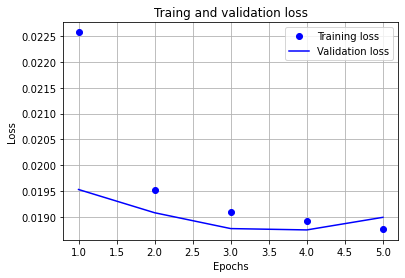

In [107]:
history_dict = h3.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 5 + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

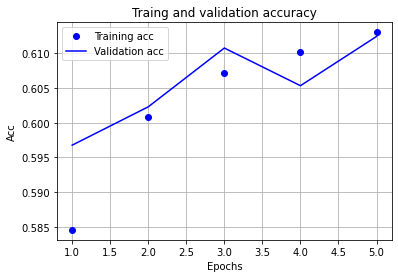

In [108]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, 5 + 1)

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [109]:
P3 = model3.predict_classes(X_testg)
P3 = P3 + 1
P3

array([50, 80, 80, ..., 80, 80, 80])

In [110]:
cnf_matrix10 = metrics.confusion_matrix(y_testg, P3)
accuracy_score(y_testg, P3)

0.6124152624443153

<Figure size 432x288 with 0 Axes>

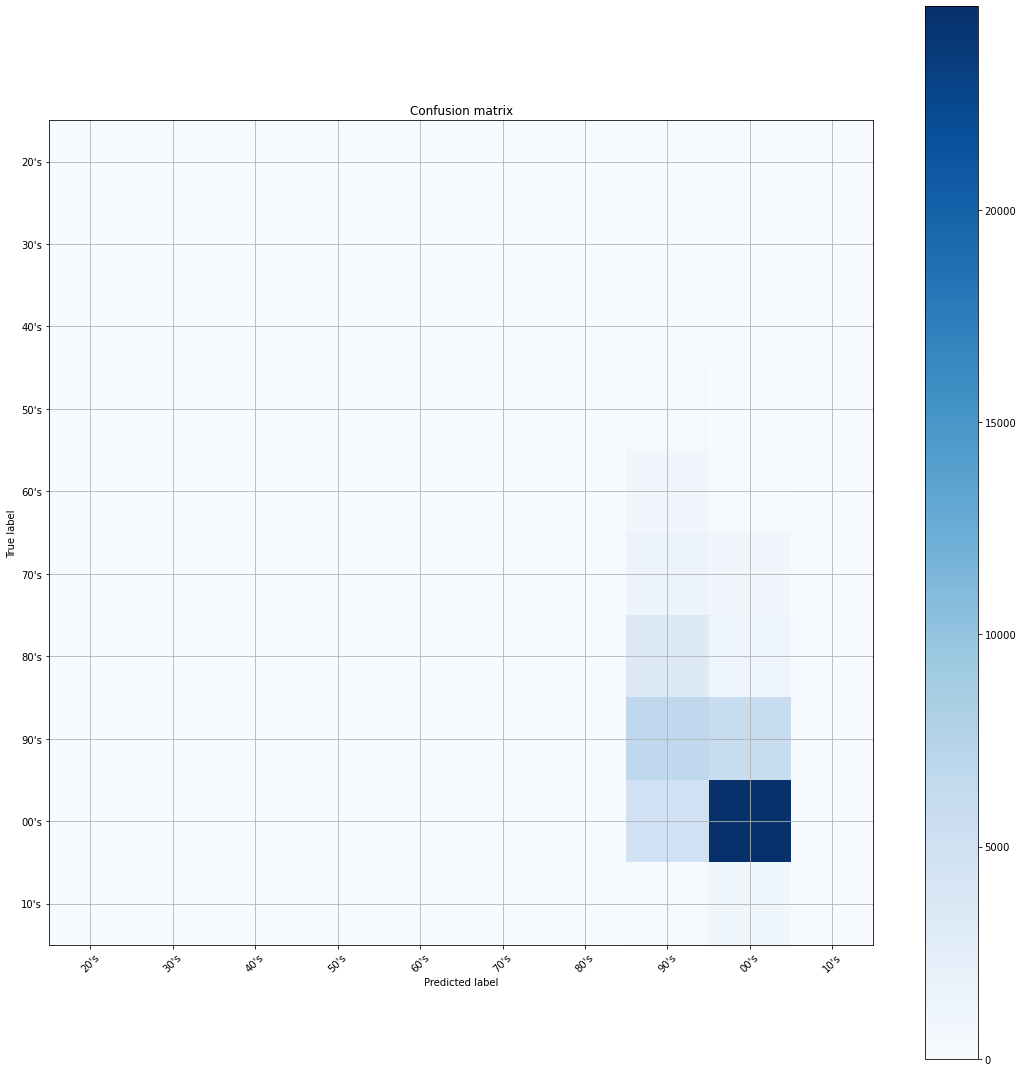

In [111]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
fig, ax = plt.subplots(figsize=(15,15)) 
labels = sorted(Testg.year.unique())
plot_confusion_matrix(cnf_matrix10, classes=["{:02d}'s".format(label%100) for label in labels],
                      title='Confusion matrix')


plt.show()

In [23]:
clf3 = LogisticRegression()
clf3.fit(X_traing, y_traing)
predicted3 = clf3.predict(X_testg)

/Users/luciedrevet/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
predicted3=predicted3.round()
cnf_matrix3 = metrics.confusion_matrix(y_testg, predicted3)

In [27]:
accuracy_score(y_testg, predicted3)

0.6014332752275808

In [ ]:
#joblib.dump(model, "chemin") --> save the model
#reloadmodel = joblib.load("cheminmodel")
#resulat = reloadmodel.score(x,y)